# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

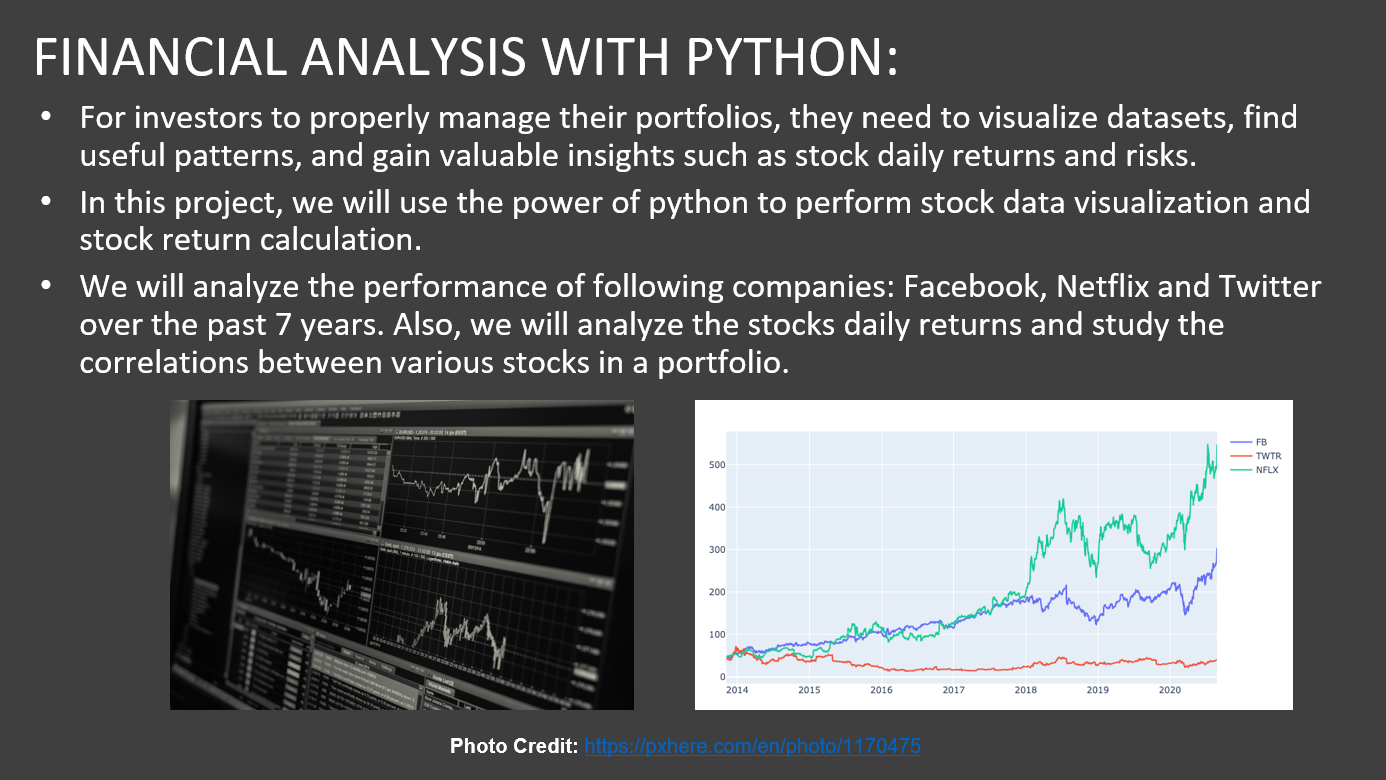

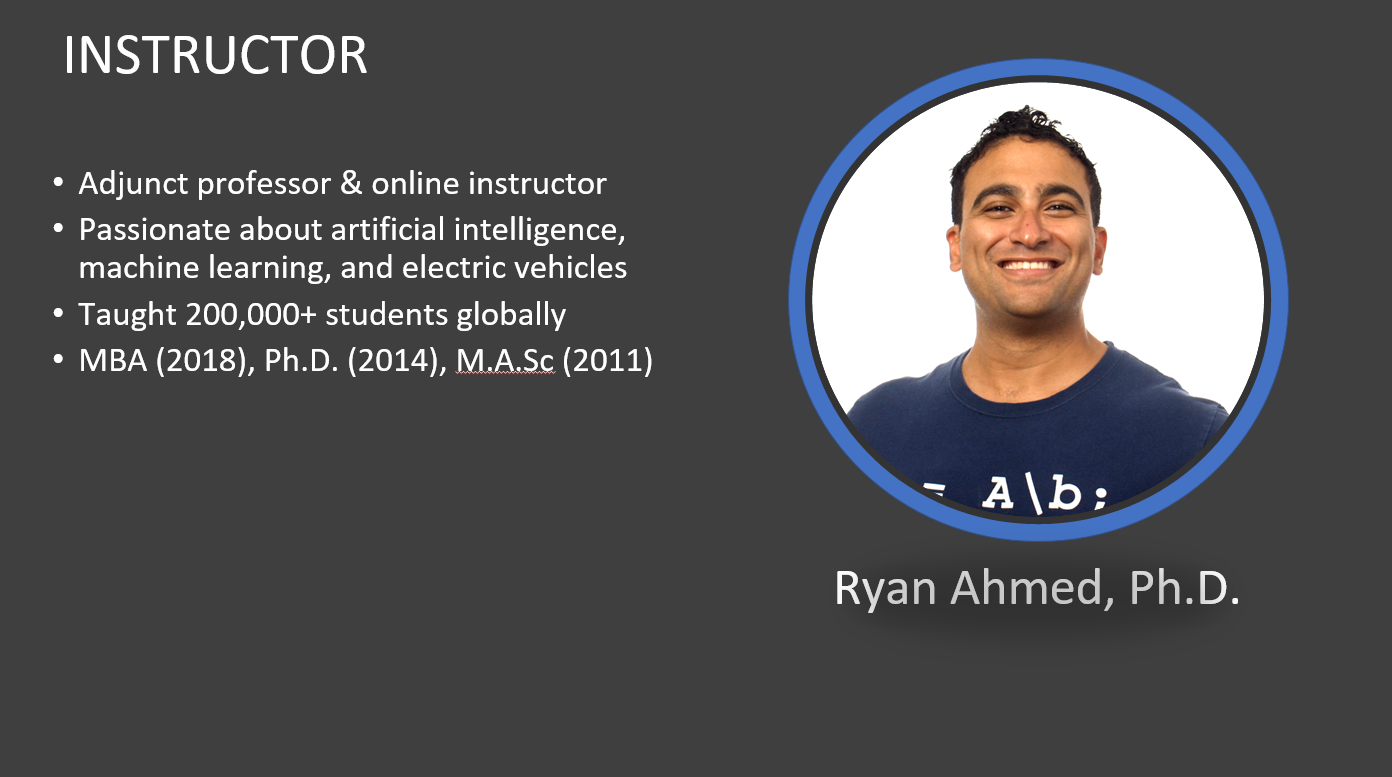

 # TASK #2: IMPORT DATASETS AND LIBRARIES

In [1]:
#!pip install quandl

In [2]:
#!pip install plotly

In [3]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go
import quandl
import seaborn as sns


In [4]:
#from jupyterthemes import jtplot
#jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [5]:
quandl.ApiConfig.api_key= "nSEvLR6h-8hSaPxVcMGX"

In [6]:
facebook_df = quandl.get('WIKI/FB', start_date = '07-11-2013', end_date = '26-08-2020')

###### API to call data
# Since we are limited by free tier, we have prepared and saved the data for later usage

In [7]:
facebook_df

Open    High     Low    Close       Volume  Ex-Dividend  \
Date                                                                    
2013-11-07   49.24   49.87   47.30   47.560   97128000.0          0.0   
2013-11-08   47.81   48.65   47.25   47.530   70731000.0          0.0   
2013-11-11   47.04   47.53   45.73   46.200   80910000.0          0.0   
2013-11-12   46.00   47.37   45.83   46.605   68196000.0          0.0   
2013-11-13   46.23   48.74   46.06   48.710   79245000.0          0.0   
...            ...     ...     ...      ...          ...          ...   
2018-03-21  164.80  173.40  163.30  169.390  105350867.0          0.0   
2018-03-22  166.13  170.27  163.72  164.890   73389988.0          0.0   
2018-03-23  165.44  167.10  159.02  159.390   52306891.0          0.0   
2018-03-26  160.82  161.10  149.02  160.060  125438294.0          0.0   
2018-03-27  156.31  162.85  150.75  152.190   76787884.0          0.0   

            Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  \
Date                                                                  
2013-11-07          1.0      49.24      49.87     47.30      47.560   
2013-11-08          1.0      47.81      48.65     47.25      47.530   
2013-11-11          1.0      47.04      47.53     45.73      46.200   
2013-11-12          1.0      46.00      47.37     45.83      46.605   
2013-11-13          1.0      46.23      48.74     46.06      48.710   
...                 ...        ...        ...       ...         ...   
2018-03-21          1.0     164.80     173.40    163.30     169.390   
2018-03-22          1.0     166.13     170.27    163.72     164.890   
2018-03-23          1.0     165.44     167.10    159.02     159.390   
2018-03-26          1.0     160.82     161.10    149.02     160.060   
2018-03-27          1.0     156.31     162.85    150.75     152.190   

            Adj. Volume  
Date                     
2013-11-07   97128000.0  
2013-11-08   70731000.0  
2013-11-11   80910000.0  
2013-11-12   68196000.0  
2013-11-13   79245000.0  
...                 ...  
2018-03-21  105350867.0  
2018-03-22   73389988.0  
2018-03-23   52306891.0  
2018-03-26  125438294.0  
2018-03-27   76787884.0  

[1102 rows x 12 columns]

In [8]:
# Read the files
stocks_df = pd.read_csv('stock_data.csv',index_col=0,parse_dates=True)

In [9]:
stocks_df = stocks_df.sort_values(by=['Date'])

In [10]:
# Sort the data based on Date
stocks_df.columns

Index(['FB', 'TWTR', 'NFLX'], dtype='object')

MINI CHALLENGE #1:
- Obtain the data for APPLE Inc. (AAPL) using Quandl. You can use the same start and end date. 

In [11]:
aapl_df=quandl.get('WIKI/AAPL', start_date = '07-11-2013', end_date = '26-08-2020')

In [12]:
aapl_df

Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2013-11-07  519.58  523.19  512.38  512.492   9379300.0          0.0   
2013-11-08  514.58  521.13  512.59  520.560   9975600.0          0.0   
2013-11-11  519.99  521.67  514.41  519.048   8123300.0          0.0   
2013-11-12  517.67  523.92  517.00  520.010   7295600.0          0.0   
2013-11-13  518.00  522.25  516.96  520.634   7043600.0          0.0   
...            ...     ...     ...      ...         ...          ...   
2018-03-21  175.04  175.09  171.26  171.270  35247358.0          0.0   
2018-03-22  170.00  172.68  168.60  168.845  41051076.0          0.0   
2018-03-23  168.39  169.92  164.94  164.940  40248954.0          0.0   
2018-03-26  168.07  173.10  166.44  172.770  36272617.0          0.0   
2018-03-27  173.68  175.15  166.92  168.340  38962839.0          0.0   

            Split Ratio   Adj. Open   Adj. High    Adj. Low  Adj. Close  \
Date                                                                      
2013-11-07          1.0   69.063873   69.543724   68.106831   68.121719   
2013-11-08          1.0   68.399261   69.269903   68.134745   69.194137   
2013-11-11          1.0   69.118372   69.341681   68.376664   68.993159   
2013-11-12          1.0   68.809991   69.640757   68.720933   69.121030   
2013-11-13          1.0   68.853856   69.418776   68.715616   69.203974   
...                 ...         ...         ...         ...         ...   
2018-03-21          1.0  175.040000  175.090000  171.260000  171.270000   
2018-03-22          1.0  170.000000  172.680000  168.600000  168.845000   
2018-03-23          1.0  168.390000  169.920000  164.940000  164.940000   
2018-03-26          1.0  168.070000  173.100000  166.440000  172.770000   
2018-03-27          1.0  173.680000  175.150000  166.920000  168.340000   

            Adj. Volume  
Date                     
2013-11-07   65655100.0  
2013-11-08   69829200.0  
2013-11-11   56863100.0  
2013-11-12   51069200.0  
2013-11-13   49305200.0  
...                 ...  
2018-03-21   35247358.0  
2018-03-22   41051076.0  
2018-03-23   40248954.0  
2018-03-26   36272617.0  
2018-03-27   38962839.0  

[1101 rows x 12 columns]

# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

In [13]:
# Checking null values
stocks_df.isnull().sum()

FB      0
TWTR    0
NFLX    0
dtype: int64

In [14]:
# Getting dataframe info
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1712 entries, 2013-11-07 to 2020-08-26
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FB      1712 non-null   float64
 1   TWTR    1712 non-null   float64
 2   NFLX    1712 non-null   float64
dtypes: float64(3)
memory usage: 53.5 KB


In [15]:
# Print the number of stocks
len(stocks_df.columns[1:])

2

MINI CHALLENGE #2: 
- What is the average price of facebook?
- Which stock has the minimum dispertion from the mean in dollar value?
- What is the maximum price for Netflix stock over the specified time period?
- Hint: Try this out: stocks_df.describe() 

In [16]:
stocks_df['FB'].mean()

136.96699175467293

In [17]:
print(stocks_df['FB'].std())
print(stocks_df['TWTR'].std())
print(stocks_df['NFLX'].std())

51.17733646828972
11.483346626158704
129.76500499702573


In [18]:
stocks_df.describe()

FB         TWTR         NFLX
count  1712.000000  1712.000000  1712.000000
mean    136.966992    31.352909   197.657978
std      51.177336    11.483347   129.765005
min      44.820000    14.010000    44.887142
25%      89.122500    19.639999    90.689999
50%     137.824997    31.720000   144.245002
75%     178.407501    38.315001   322.102493
max     303.910004    73.309998   548.729980

# TASK #4: PERFORM BASIC DATA VISUALIZATION

In [19]:
stocks_df

FB       TWTR        NFLX
Date                                         
2013-11-07   47.560001  44.900002   46.694286
2013-11-08   47.529999  41.650002   47.842857
2013-11-11   46.200001  42.900002   48.272858
2013-11-12   46.610001  41.900002   47.675713
2013-11-13   48.709999  42.599998   47.897144
...                ...        ...         ...
2020-08-20  269.010010  38.959999  497.899994
2020-08-21  267.010010  39.259998  492.309998
2020-08-24  271.390015  40.490002  488.809998
2020-08-25  280.820007  40.549999  490.579987
2020-08-26  303.910004  41.080002  547.530029

[1712 rows x 3 columns]

In [20]:
# Define a function to plot the entire dataframe
# The function takes in a dataframe df as an input argument and does not return anything back!
# The function performs data visualization
# Pandas works great with matplotlib, you can simply plot data directly from a Pandas DataFrame using plot() method
def show_plot(df,title):
    df.plot(figsize=(15,8),title=title)
    plt.grid()
    plt.ylabel('Price')
    plt.show()

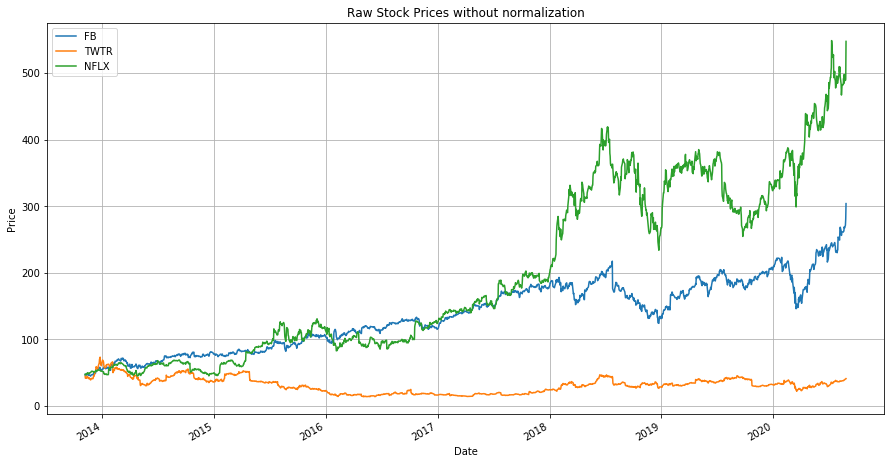

In [21]:
# Plot the data
show_plot(stocks_df, 'Raw Stock Prices without normalization')

MINI CHALLENGE #3:
- Let's assume that we want to normalize our stock prices data, what should we do?
- Print out normalized (scaled) stock prices 

In [22]:
stocks_df

FB       TWTR        NFLX
Date                                         
2013-11-07   47.560001  44.900002   46.694286
2013-11-08   47.529999  41.650002   47.842857
2013-11-11   46.200001  42.900002   48.272858
2013-11-12   46.610001  41.900002   47.675713
2013-11-13   48.709999  42.599998   47.897144
...                ...        ...         ...
2020-08-20  269.010010  38.959999  497.899994
2020-08-21  267.010010  39.259998  492.309998
2020-08-24  271.390015  40.490002  488.809998
2020-08-25  280.820007  40.549999  490.579987
2020-08-26  303.910004  41.080002  547.530029

[1712 rows x 3 columns]

# TASK #5: PERFORM INTERACTIVE DATA VISUALIZATION 

In [23]:
# Function to plot interative plot plot
def interactive_plot(df,title):
    fig = px.line(title=title)
    for i in df.columns:
        fig.add_scatter(x=df.index,y=df[i],name=i)
    fig.show()

In [24]:
# Plot interactive chart
interactive_plot(stocks_df,'Interactive plot')

MINI CHALLENGE #4:
- Plot normalized stock data in an interactive way
- It seems that most stocks experienced massive drops in Q1 of 2020, let's assume that you own 1000 shares of Facebook on Jan 2nd, 2020 and you sold them on March 16th, 2020. How much did you lose (in $)?**

# TASK #6: CALCULATE INDIVIDUAL STOCKS DAILY RETURNS

In [25]:
stocks_data = pd.read_csv('stock_data.csv',index_col=0,parse_dates=True)
df_daily_return = stocks_data.pct_change()

In [26]:
df_daily_return

FB      TWTR      NFLX
Date                                    
2013-11-07       NaN       NaN       NaN
2013-11-08 -0.000631 -0.072383  0.024598
2013-11-11 -0.027982  0.030012  0.008988
2013-11-12  0.008874 -0.023310 -0.012370
2013-11-13  0.045055  0.016706  0.004645
...              ...       ...       ...
2020-08-20  0.024449  0.001800  0.027594
2020-08-21 -0.007435  0.007700 -0.011227
2020-08-24  0.016404  0.031330 -0.007109
2020-08-25  0.034747  0.001482  0.003621
2020-08-26  0.082223  0.013070  0.116087

[1712 rows x 3 columns]

MINI CHALLENGE #5:
- Calculate the daily return for Twitter stock

In [27]:
stocks_df['TWTR'].pct_change()

Date
2013-11-07         NaN
2013-11-08   -0.072383
2013-11-11    0.030012
2013-11-12   -0.023310
2013-11-13    0.016706
                ...   
2020-08-20    0.001800
2020-08-21    0.007700
2020-08-24    0.031330
2020-08-25    0.001482
2020-08-26    0.013070
Name: TWTR, Length: 1712, dtype: float64

# TASK #7: PLOT MULTIPLE STOCKS DAILY RETURNS

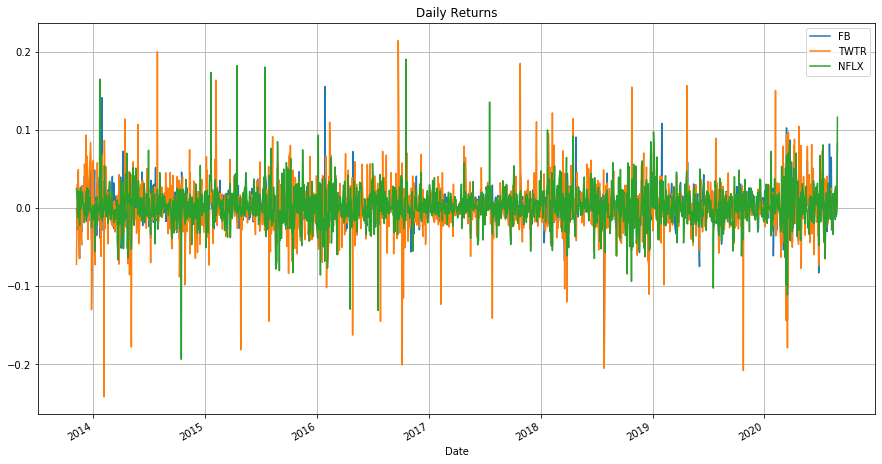

In [28]:
# Plot the daily returns
df_daily_return.plot(figsize=(15,8),title='Daily Returns')
plt.grid()
plt.show()

In [29]:
interactive_plot(df_daily_return, 'Interactive Plot for Daily Returns')

MINI CHALLENGE #6:
- What is the maximum daily return in % values

In [30]:
df_daily_return.describe()

FB         TWTR         NFLX
count  1711.000000  1711.000000  1711.000000
mean      0.001292     0.000540     0.001790
std       0.020344     0.034131     0.026562
min      -0.189609    -0.241625    -0.193696
25%      -0.007929    -0.014370    -0.011224
50%       0.001248     0.000878     0.000459
75%       0.011293     0.015060     0.014718
max       0.155214     0.214171     0.190281

# TASK #8: ANALYZE DAILY RETURNS

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000219DB2F4A48>,
      dtype=object)

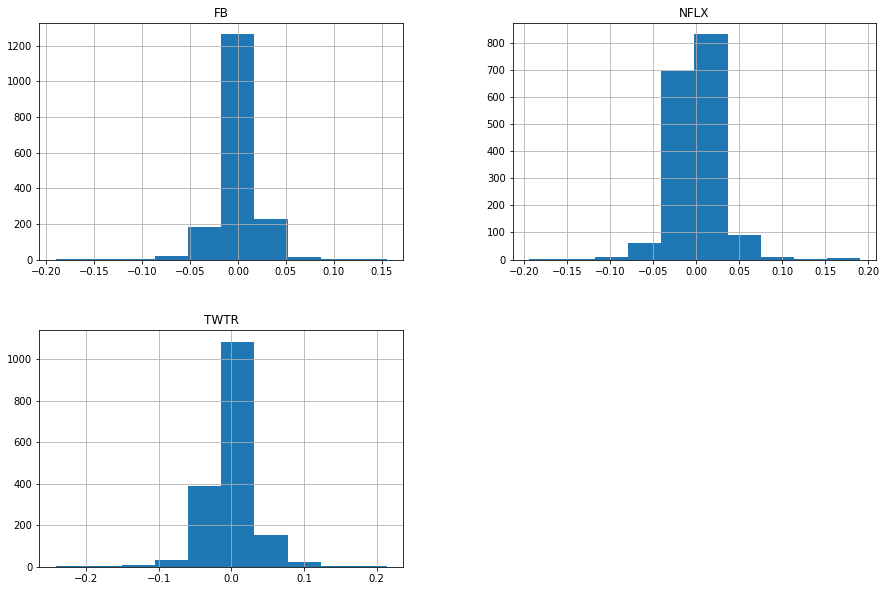

In [31]:
# Histogram of daily returns
df_daily_return.hist(figsize=(15,10),bins=10)

In [32]:
df_hist = df_daily_return.copy()
df_hist.reset_index(drop=True, inplace=True)

In [33]:
#Removing NaN Row
df_hist = df_hist.iloc[1:]

In [34]:
df_hist

FB      TWTR      NFLX
1    -0.000631 -0.072383  0.024598
2    -0.027982  0.030012  0.008988
3     0.008874 -0.023310 -0.012370
4     0.045055  0.016706  0.004645
5     0.005748  0.049061  0.021743
...        ...       ...       ...
1707  0.024449  0.001800  0.027594
1708 -0.007435  0.007700 -0.011227
1709  0.016404  0.031330 -0.007109
1710  0.034747  0.001482  0.003621
1711  0.082223  0.013070  0.116087

[1711 rows x 3 columns]

In [35]:
data = []

In [36]:
for i in df_hist.columns:
    data.append(df_daily_return[i].values)

In [37]:
#Converting list to numpy array
data = np.array(data)

In [38]:
print(data)

[[        nan -0.00063082 -0.02798229 ...  0.0164039   0.03474701
   0.08222348]
 [        nan -0.07238307  0.030012   ...  0.0313297   0.00148177
   0.01307036]
 [        nan  0.02459768  0.00898778 ... -0.00710934  0.00362102
   0.11608717]]


In [39]:
#Removing NaN values from numpy array
data = data[:, ~np.isnan(data).any(axis=0)]

In [40]:
print(data)

[[-0.00063082 -0.02798229  0.00887446 ...  0.0164039   0.03474701
   0.08222348]
 [-0.07238307  0.030012   -0.02331002 ...  0.0313297   0.00148177
   0.01307036]
 [ 0.02459768  0.00898778 -0.0123702  ... -0.00710934  0.00362102
   0.11608717]]


In [41]:
# Create distplot with custom bin_size
fig = ff.create_distplot(data, df_hist.columns, bin_size=0.02)
fig.show()

MINI CHALLENGE #7:
- Calculate the correlation matrix for the stocks daily return and comment on your answer

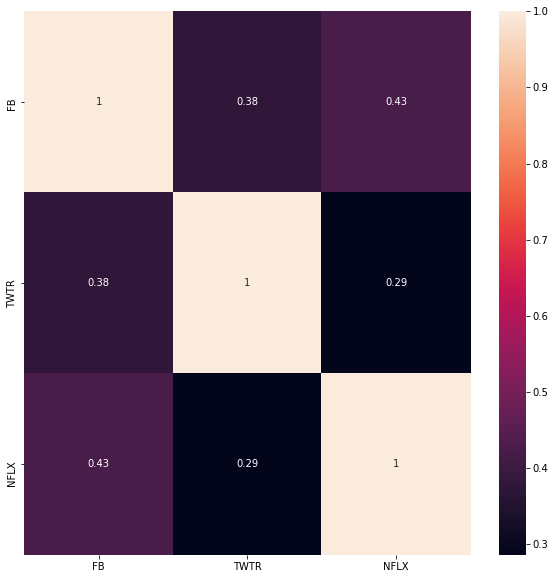

In [43]:
cm = df_daily_return.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot = True)

# CONGRATULATION!

# MINI CHALLENGE SOLUTIONS

MINI CHALLENGE #3 SOLUTION:
- Let's assume that we want to normalize our stock prices data, what should we do?
- Print out normalized (scaled) stock prices 

In [47]:
# Function to normalize the prices based on the initial price
# The function simply divides every stock by it's price at the start date (i.e.: Date = 2012-01-12)	
def normalize(df):
    x = df.copy()
  # Loop through each stock (while ignoring time columns with index 0)
    for i in x.columns[1:]:
        x[i] = x[i]/x[i][0]

    return x


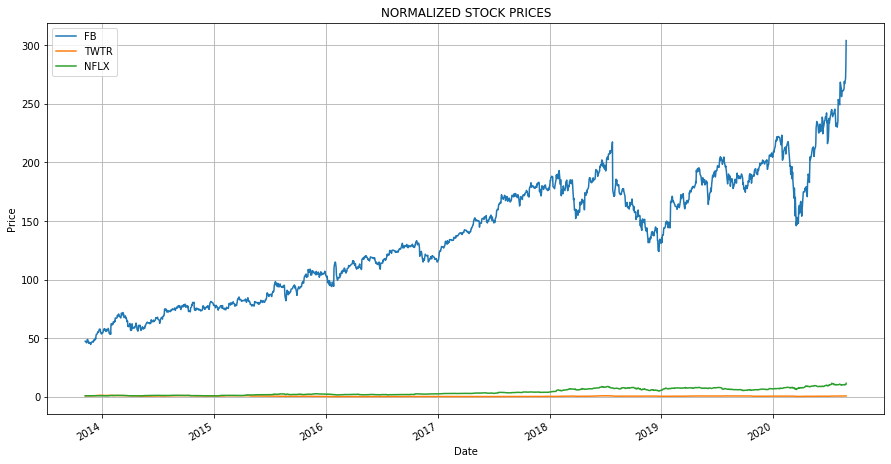

In [48]:
# Plot normalized data
# Notice the massive gains in Netflix Stock compared to Twitter stock
show_plot(normalize(stocks_df), 'NORMALIZED STOCK PRICES')

MINI CHALLENGE #4 SOLUTION:
- Plot normalized stock data in an interactive way
- It seems that most stocks experienced massive drops in Q1 of 2020, let's assume that you own 1000 shares of Facebook on Jan 2nd, 2020 and you sold them on March 16th, 2020. How much did you lose (in $)?**

In [49]:
# Plot normalized interactive chart
interactive_plot(normalize(stocks_df), 'Normalized Prices')
# Facebook stock dropped from $209.78 on Jan 2nd, 2020 to $146.01 by March 16th, 2020 
# Net loss = $209.78 - $146.01 = $63.77 * 1000 = $63770